In [1]:
# End to End Machine Learning Project
"""
1 Look at the big picture.[Frame the problem, Select the Performance Measure] 2 Get the data. 3 Discover and visualize the data to gain insights.
4 Prepare data for machine learnig algo. 5 Select a model and train it. 6 Fine-tune your model.
7 Present your solution. 8 Laucnh, monitor, and mainitain your system.
"""


'\n1 Look at the big picture.[Frame the problem, Select the Performance Measure] 2 Get the data. 3 Discover and visualize the data to gain insights.\n4 Prepare data for machine learnig algo. 5 Select a model and train it. 6 Fine-tune your model.\n7 Present your solution. 8 Laucnh, monitor, and mainitain your system.\n'

In [2]:
import os, tarfile, urllib 

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

In [4]:
HOUSING_PATH = os.path.join("datasets", "housing")

In [5]:
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [6]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

In [7]:
fetch_housing_data(HOUSING_URL, HOUSING_PATH)

In [8]:
import pandas as pd

In [9]:
def load_housing_data(housing_path = HOUSING_PATH):
    cvs_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(cvs_path)

In [10]:
housing = load_housing_data()

In [11]:
# relives first 5 instances in data as preview

housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
#info method is used to get quick description of the data:
#The number of rows, attribute's type, num of nonnull values

housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
"""
Find out what categories exist and how many districs belong
to each category by using the value_counts method

"""

housing['ocean_proximity'].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
# Hows a summary of the numerical attributes.

housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

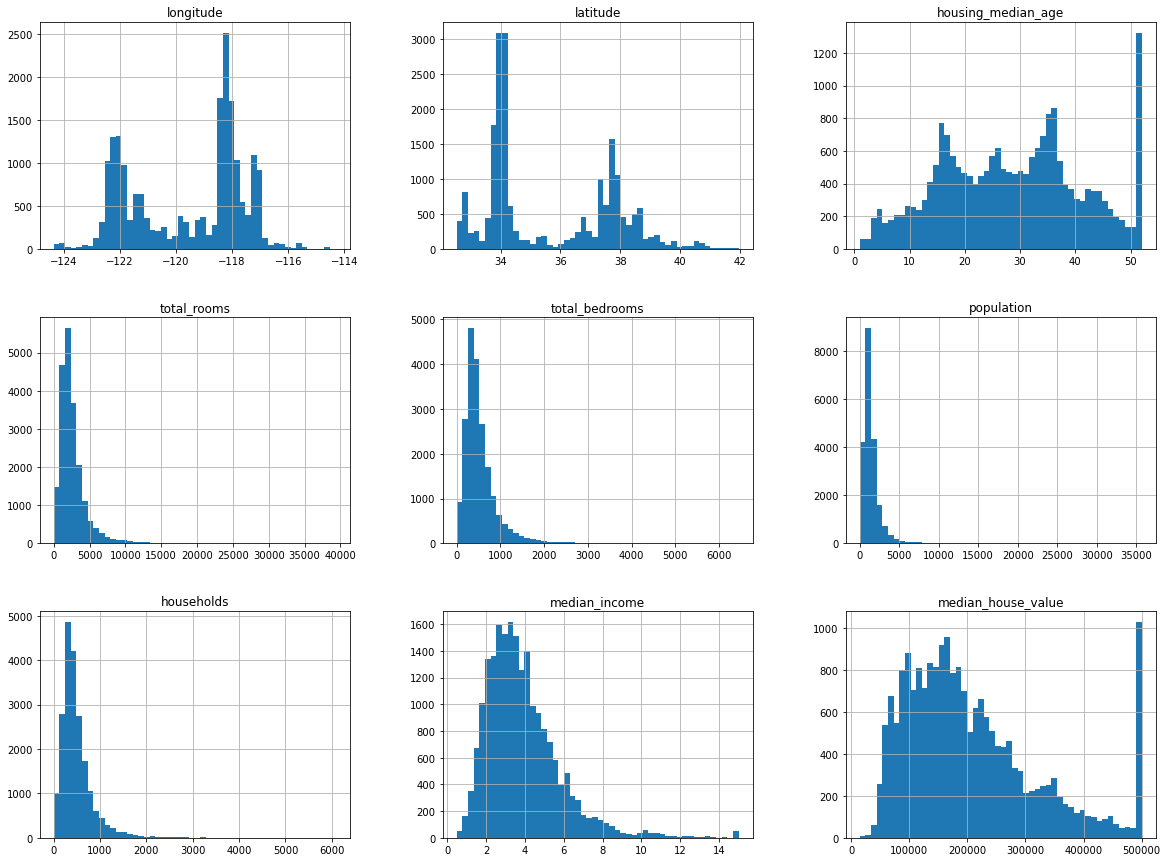

In [15]:
"""
A Histogram shows the number of insrances (on the vertical axis)
that have a given value range(on the horizontal axis)
"""

%matplotlib inline 

import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))

In [16]:
# Create a Test Set 

import numpy as np
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=14)

In [17]:
"""
The following code users the pd.cut() funtion
to create an income category attribute with five categories
"""

'\nThe following code users the pd.cut() funtion\nto create an income category attribute with five categories\n'

In [18]:
housing['income_cat'] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels = [1, 2, 3, 4, 5])

<AxesSubplot:>

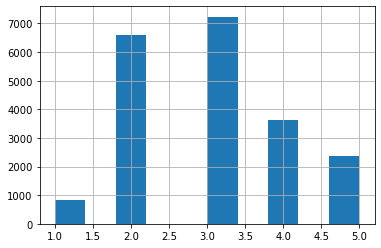

In [19]:
housing['income_cat'].hist()

In [20]:
"""
Now we are ready to do stratified sampling based on the income category
In stratified sampling the values are divided into homogenenous subgroups called strata,
and the right number of instances are sampled from each stratum
to guarantee that the test set is representative of the overall popolation.
"""

'\nNow we are ready to do stratified sampling based on the income category\nIn stratified sampling the values are divided into homogenenous subgroups called strata,\nand the right number of instances are sampled from each stratum\nto guarantee that the test set is representative of the overall popolation.\n'

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=14)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [22]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [23]:
# Remove income_cat attribute so the data is back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [24]:

# Discover and Visualize the Data to Gain Insights.
# create a copy to avoid hicups

housing = strat_train_set.copy()


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

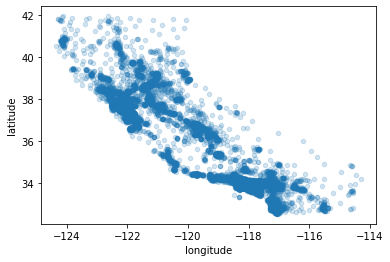

In [25]:
# Visualizing Geographical Data

housing.plot(kind='scatter', x='longitude', y='latitude', alpha =0.2)

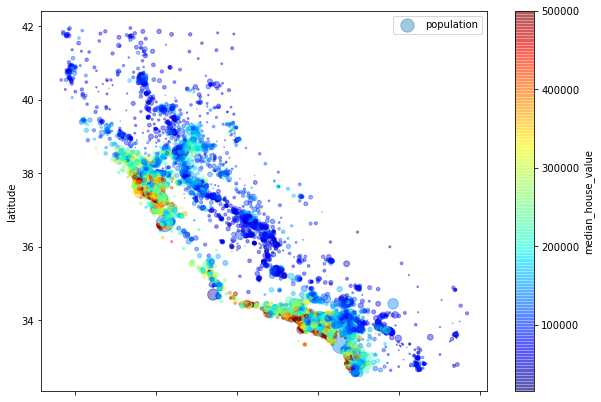

In [26]:
"""
Looking at housing prices.

The radius of each circle represents the district's population (option s) 
The color represents the price (option c)
Jets ranges from blue (low val) to red (high price)
"""


housing.plot(kind='scatter', x = 'longitude', y = 'latitude', alpha=0.4,
            s=housing['population'] / 100, label='population', figsize=(10,7),
            c='median_house_value', cmap = plt.get_cmap('jet'), colorbar=True,
)
plt.legend()

In [27]:
""" 
Looking for Correlations.
If dataset is not too large, compute standard correlation coefficient between every pair of attributes
"""

corr_matrix = housing.corr()


In [28]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686922
total_rooms           0.134830
housing_median_age    0.101327
households            0.067111
total_bedrooms        0.050289
population           -0.022197
longitude            -0.043755
latitude             -0.146982
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

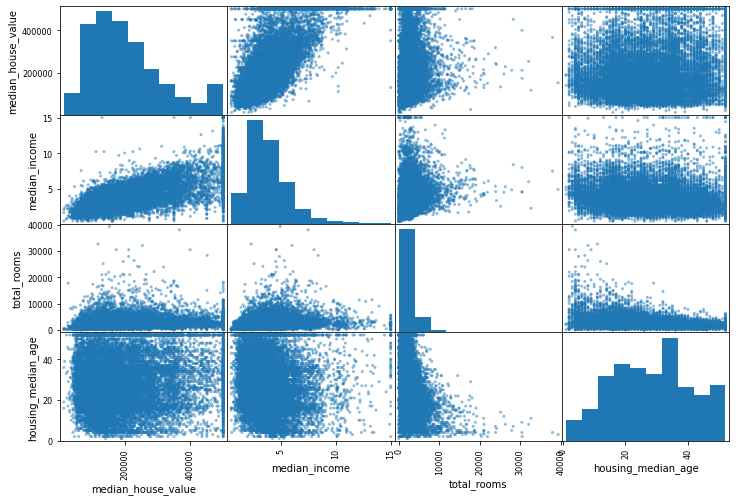

In [29]:
"""
Another way to check for correlation between attirbutes.
Use pandas scatter_matrix(). Plots every numerical attribute against every other.
"""

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

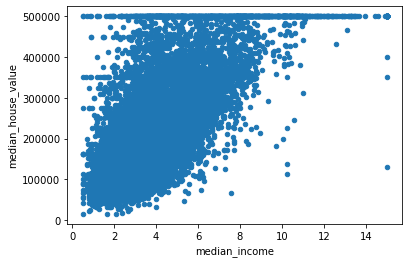

In [30]:
"""
The most promising attribute to predict the median huse value is the median income 
Lets zoom in on their correlation scatterplot
"""

housing.plot(kind="scatter", x='median_income', y="median_house_value")


In [31]:
# Experimenting with attribute Combinations
"""
One last thing you want to do to is try out various attribute combinations

"""

'\nOne last thing you want to do to is try out various attribute combinations\n\n'

In [32]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']

housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']

housing['population_per_household']=housing['population']/housing['households']

In [33]:
# Lets look at the correlation matrix again.

corr_matrix_t = housing.corr()
corr_matrix_t['median_house_value'].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.686922
rooms_per_household         0.142825
total_rooms                 0.134830
housing_median_age          0.101327
households                  0.067111
total_bedrooms              0.050289
population_per_household   -0.021942
population                 -0.022197
longitude                  -0.043755
latitude                   -0.146982
bedrooms_per_room          -0.251096
Name: median_house_value, dtype: float64

In [34]:
# Prepare the Data for Machine Learning Algorithms
"""
When prepairng data for machine learning write funtions for this purpose,
It allo|ws you to reproduce there transformations eassily on any dataset(next time you  get a dataset).
You will gradually build a library of transformation funtions that you reuse in future projects.
You can use these functions in your live system to transform the new data before feeding it to your algos.
This will make it possible for you to easily try out various transformations and see which combination of transformations works.
"""

# A clean dataset and seperated predictiors and labels

housing = strat_train_set.drop('median_house_value', axis=1)
housing_label = strat_train_set['median_house_value'].copy()
    

In [35]:
# Data Cleaning

"""
Most Machine Learning algos cannot work with missing features.
We create a few functios to take care of them.

1.Get rid of the corresponding districts.
2.Get rid of the whole attribute.
3.Set the values to some value(zero, the mean, the median,etc)
"""

'\nMost Machine Learning algos cannot work with missing features.\nWe create a few functios to take care of them.\n\n1.Get rid of the corresponding districts.\n2.Get rid of the whole attribute.\n3.Set the values to some value(zero, the mean, the median,etc)\n'

In [36]:
#1.Get rid of the corresponding districts.
#housing.dropna(subset=["total_bedrooms"]) # option 1

In [37]:
# 2.Get rid of the whole attribute.

#housing.drop('total_bedrooms', axis=1) # option 2

In [38]:
# 3.Set the values to some value(zero, the mean, the median,etc)

#median = housing['total_bedrooms'].median() # option 3

In [39]:
#housing['total_bedrooms'].fillna(median, inplace=True)

In [40]:
"""
Scikit-Learn provides a handy class to take care of missing values.

SimpleImputer

First create a SimpleImput instane.
Secifying that you want to replace each attributes missing values with the median of that attribute.
"""

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

# Copy of the data without text attribute ocean_proximity

housing_num = housing.drop('ocean_proximity', axis=1)

In [41]:
# Fit the imputer instance to the training data using the fit() method.
# safer to just apply to all numerical attributes

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [42]:
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2140.5    ,  436.     ,
       1171.     ,  411.     ,    3.53175])

In [43]:
housing_num.median().values

array([-118.5    ,   34.26   ,   29.     , 2140.5    ,  436.     ,
       1171.     ,  411.     ,    3.53175])

In [44]:
# Now use this "Trained" imputer to transform to the training set by replacing missing values with the learned medians.

X = imputer.transform(housing_num)

In [45]:
# returns array with transformed features. Lets put back into a DF

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [46]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
2507,-120.51,36.86,21.0,1779.0,399.0,1446.0,371.0,2.4414
5498,-118.41,34.00,18.0,1307.0,441.0,884.0,456.0,2.9338
7017,-118.09,33.98,39.0,936.0,194.0,691.0,211.0,3.6875
4685,-118.35,34.07,48.0,890.0,255.0,434.0,232.0,3.6111
10533,-117.68,33.51,4.0,2428.0,401.0,959.0,386.0,6.2661
...,...,...,...,...,...,...,...,...
4973,-118.28,34.00,42.0,1534.0,417.0,1295.0,380.0,2.0938
15809,-122.43,37.76,52.0,3771.0,1017.0,1575.0,921.0,3.5655
19885,-119.11,36.29,18.0,1666.0,294.0,859.0,301.0,2.6065
5694,-118.25,34.25,34.0,3150.0,518.0,1392.0,480.0,4.9355


In [47]:
# Handling Text and Categorical Attributes

housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
2507,INLAND
5498,<1H OCEAN
7017,<1H OCEAN
4685,<1H OCEAN
10533,<1H OCEAN
17115,NEAR BAY
633,NEAR BAY
18556,NEAR OCEAN
1797,NEAR BAY
7095,<1H OCEAN


In [48]:
"""
This categorical can be encoded using scikit-learns OrdinalEncoder.
Algo work with number not text.
"""

#from sklearn.preprocessing import OrdinalEncoder
#ordinal_encoder = OrdinalEncoder()
#housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
#housing_cat_encoded[:10]

'\nThis categorical can be encoded using scikit-learns OrdinalEncoder.\nAlgo work with number not text.\n'

In [49]:
# Get a list of categories using the categories_ instance variable.
# A list containing a 1d array of categories for each categorical type.

#ordinal_encoder.categories_


In [50]:
"""
One issue with this representation is that ML algos will assume that two nearby values are more similar than two distant ones.
To fix this issue scikit learn provides a OneHotEncoder class to convert categorical values into one-hot vectorts
"""

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

# Out is a SciPy sparse matrix, to save memory space. sparse matrix stores location of nonzero elements
# Can we used mostly as 2d array but if you really want to convert it to a dense Numpy array call toarray() method

housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [51]:
# Feature Scaling 
"""
One of the most important transformation needed on the data is feature scaling.
Machine Learning algos dont perform well when fed several scales for values.

Scaling target values is generally not required.

Two common ways to get all attributes to have the same scale, min-max scaling and standardization. 

Min-max scaling (simplest and called normalization) values are shifted and rescled so that they end up ranging from 0-1.

By subtracting the min value and dividing by the max minus the min. 
Scikit_Learn provides a transformation called MinMaxScaler for this.
It has a hyperparameter that lets change the range if, for some reason you dont want 0-1.


Standardization is different:
First it subtracts the mean value (so standardized values always have zero mean),
and it divides by the standard deviation so that the resulting distribution has unit variance. 
Standardization does not bound values to a specific range.
It is much less effected by outliers.
Scikit_Learn provies a transformer called StandardScaler for Standardization.
As with all the transformatios, it is important to fit the scalers to the training data only.
Only then can you use them to transform the training set and the test set.
"""

'\nOne of the most important transformation needed on the data is feature scaling.\nMachine Learning algos dont perform well when fed several scales for values.\n\nScaling target values is generally not required.\n\nTwo common ways to get all attributes to have the same scale, min-max scaling and standardization. \n\nMin-max scaling (simplest and called normalization) values are shifted and rescled so that they end up ranging from 0-1.\n\nBy subtracting the min value and dividing by the max minus the min. \nScikit_Learn provides a transformation called MinMaxScaler for this.\nIt has a hyperparameter that lets change the range if, for some reason you dont want 0-1.\n\n\nStandardization is different:\nFirst it subtracts the mean value (so standardized values always have zero mean),\nand it divides by the standard deviation so that the resulting distribution has unit variance. \nStandardization does not bound values to a specific range.\nIt is much less effected by outliers.\nScikit_Learn

In [52]:
# Tansformation Pipelines
"""
There are many data transformation steps that need to be executed in the right order.
Fortunatley, Scikit_Learn provides Pipeline class to helo with such sequences of transformation.
"""

#Small pipeline for the nummerical attributes 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler\

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
     
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-0.47147648,  0.57619529, -0.59944221, ...,  0.01402849,
        -0.33962568, -0.75543622],
       [ 0.5778401 , -0.76357126, -0.83764187, ..., -0.47991137,
        -0.1181035 , -0.49484616],
       [ 0.73773596, -0.77294025,  0.82975574, ..., -0.6495384 ,
        -0.75660861, -0.09596977],
       ...,
       [ 0.22806791,  0.30917888, -0.83764187, ..., -0.50188378,
        -0.52205571, -0.66806129],
       [ 0.65778803, -0.6464588 ,  0.43275631, ..., -0.03343192,
        -0.05555606,  0.56450221],
       [ 0.90262857, -0.74014877,  0.59155608, ...,  1.42817304,
         0.73149923, -1.04042353]])

In [53]:
"""
So far we have handled the categorical columns and the numarical columns separately. 
We prefer to have a single transformer able to handle all columns.
Applying the appropriate transforamtionn to each column. 
Scikit_Learn introduced the ColumnTransformer for this purpose.
"""

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

# we get a list of categorical column names and the list of numerical column names.

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

"""
We then contruct the ColumnTransformer.
The constructor requiers a lust of tuples, where each tupple contains a name , a transformer , and a list of names (or indices)
of columns that transformer should be applied to.
"""

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared


'''
Note that the OneHotEncoder returns a sparse matrix & num_pipeline returns a dense matrix.
When there is such a mix of sparse and dense matrices, ColumnTranformer estimates the density of the final matrix.
And returns a sparse matrix if the density is lower than a given threshold.
By default the sparse_threshold=0.3.


'''

'\nNote that the OneHotEncoder returns a sparse matrix & num_pipeline returns a dense matrix.\nWhen there is such a mix of sparse and dense matrices, ColumnTranformer estimates the density of the final matrix.\nAnd returns a sparse matrix if the density is lower than a given threshold.\nBy default the sparse_threshold=0.3.\n\n\n'

In [54]:
# Select and Train a Model 
"""
Training and Evaluating on the Training Set

Let's train a Linear Regression model.
"""

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_label)

# Done you now have a working Linear Regression Model

LinearRegression()

In [55]:
# Trying a few instances from the training set

some_data = housing.iloc[:5]
some_labels = housing_label.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

print("Labels:", list(some_labels))

Predictions: [ 92983.7967567  198540.76934514 215403.88063394 242360.85431681
 289933.54914074]
Labels: [71900.0, 276300.0, 169500.0, 450000.0, 268500.0]


In [56]:
# Measuring the regression models RMSE on the whole traiing set using Sklearns mean_squared_error function 

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

"""
This model underfits the data.
When this happens it can mean that the features do not provide enough information to make good predictions.
Or that model is not powerful enough. This can be fixed by.
Select a more powerful model, feed the training algo with better features, or reduce constraints on the model
"""


'\nThis model underfits the data.\nWhen this happens it can mean that the features do not provide enough information to make good predictions.\nOr that model is not powerful enough. This can be fixed by.\nSelect a more powerful model, feed the training algo with better features, or reduce constraints on the model\n'

In [57]:
# Lets train a more powerful model a DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label)

DecisionTreeRegressor()

In [58]:
# Now that the model is trained. Lets evaluate it on the training set

housing_predictions_reg = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_label, housing_predictions_reg)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

"""
This model badly overfits the data.
You dont want to touch the test set until you are ready to lauch a model you are confident about.
Use part of the training set for training and part of it for model validation.
"""

'\nThis model badly overfits the data.\nYou dont want to touch the test set until you are ready to lauch a model you are confident about.\nUse part of the training set for training and part of it for model validation.\n'

In [59]:
# Better Evaluation Using Cross-Validation 

"""
Using sklearn K-Fold-cross-validation feature.
This code randomly splits the training set into 10 distinct subsets called folds.
Then it trains and evaluates the Decision Tree model 10 times.
Picking a diffrent fold for evalutaion every time and training on the other 9 folds.
The result is an array containing the 10 evalution scores.
"""

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_label,
                        scoring = 'neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [60]:
# Lets look at the results 

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
    
display_scores(tree_rmse_scores)

"""
Cross-validation allows you to get not only an estimate od the performance of your model.
Also an estimate of how precise this estimate is (is standard deviation
"""

Scores: [70435.98162893 69707.4251296  70735.40367662 70747.87403674
 68401.12690248 69025.08479697 72519.98818468 69552.67109881
 64220.15954779 63771.01059294]
Mean: 68911.67255955524
Standard deviation: 2679.46657228277


'\nCross-validation allows you to get not only an estimate od the performance of your model.\nAlso an estimate of how precise this estimate is (is standard deviation\n'

In [61]:
# Lets compute the same scores for the Linear Regression Model 

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_label,
                            scoring='neg_mean_squared_error', cv=10)

In [62]:
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66325.04763498 68585.91988796 66588.03098565 76369.06846584
 67737.80992837 66782.65208597 72930.07591532 68122.38934292
 65927.45296939 65075.99802158]
Mean: 68444.44452379638
Standard deviation: 3345.518908925539


In [63]:
# Above we show that the Decision Tree is overfitting so badly that it performs worse than the Linear Regression Model.

""" 
Lets try another model RandomForestRegressor.

RandomForestRegressor work by training many decision trees on random subsets of the features, then averaging out predictions.
Building Model on top of many other models is called Ensemble Learning 
"""

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_label)

RandomForestRegressor()

In [64]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_label,
                               scoring = 'neg_mean_squared_error', cv= 10)

In [65]:
forest_rsme = np.sqrt(-forest_scores)
forest_rsme

array([48590.58522392, 50688.44303585, 47880.11283244, 50475.33877409,
       48012.38936016, 47863.73417121, 52663.2910219 , 48554.93822258,
       46993.47893843, 45404.32353752])

In [66]:
display_scores(forest_rsme)

Scores: [48590.58522392 50688.44303585 47880.11283244 50475.33877409
 48012.38936016 47863.73417121 52663.2910219  48554.93822258
 46993.47893843 45404.32353752]
Mean: 48712.663511809165
Standard deviation: 1961.1955903451071


In [67]:
"""
Save every model you expiriment with so that you can come back to easily to any model you want. 
Save the hyperparameters and the trained parameters,
as well as the cross-validation scores and the actual predictions as well.
"""

'\nSave every model you expiriment with so that you can come back to easily to any model you want. \nSave the hyperparameters and the trained parameters,\nas well as the cross-validation scores and the actual predictions as well.\n'

In [68]:
#joblib.dump(my_model, "my_model.pkl")
# look into pickle and joblib

In [69]:
# Fine-Tube Your Model 
# After finding a few promising models you need to fine_tune them
# Grid Search 
'''
Using sklearns GridSearchCV all you need to do is tell is which hyperparameters you want it to expiriment with
What values to try out and it will use cross-validation to evaluate all the posible combinations of hyperparameter values.
The following code searches for the best hyperpars values for the RandomForestRegression.
'''

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators' : [3, 10, 30], 'max_features':[2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [70]:
forest_reg = RandomForestRegressor()

In [71]:
grid_search = GridSearchCV(forest_reg, param_grid, cv= 5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(housing_prepared, housing_label)

"""
When you have no idea what value a hyperparam should have try consecutive powers of 10.
Or a small number if you want a more fine-grained search

"""

'\nWhen you have no idea what value a hyperparam should have try consecutive powers of 10.\nOr a small number if you want a more fine-grained search\n\n'

In [72]:
"""
This param_grid tells sklearn to first evaluate all 3 X 4 = 12 combinations of n_estimators
and max_features hyperparams specified in the first dict
Then try all 2 x 3 = 6 combinations of hyperpara values in the second dict with bootstrap hyperpara set to false.
Grid Search will explore 12 + 6 = 18 combinations of randomforestregressor hyperparameter values.
Train each model 5 times (since we are using five-fold cross-validation)

"""
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [73]:
# You can also get the best estimator directly 
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [74]:
"""
If grid search is initialized with refit = True (Which is the default)\
Then once it finds the best estimator using crossvalidation.
Retrain on the whole training set. Usually a good idea. since feeding it more data will likely improve its performance.

Avalible evalutaion scores
"""
cvres = grid_search.cv_results_
for mean_score, paras in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), paras)




63694.115566139124 {'max_features': 2, 'n_estimators': 3}
54775.601471647395 {'max_features': 2, 'n_estimators': 10}
52499.497314437845 {'max_features': 2, 'n_estimators': 30}
59907.305010964534 {'max_features': 4, 'n_estimators': 3}
52248.12921164325 {'max_features': 4, 'n_estimators': 10}
49902.07077980317 {'max_features': 4, 'n_estimators': 30}
58420.94781335908 {'max_features': 6, 'n_estimators': 3}
51666.29515315257 {'max_features': 6, 'n_estimators': 10}
49603.45565243092 {'max_features': 6, 'n_estimators': 30}
57072.28559027309 {'max_features': 8, 'n_estimators': 3}
51321.47822810523 {'max_features': 8, 'n_estimators': 10}
49418.44783337739 {'max_features': 8, 'n_estimators': 30}
62201.704296721546 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53384.806009392974 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59219.3582025005 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51960.20967359673 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [75]:
"""
# Analyze the Best Models and Their Errors 

Gain insights on the problem by inspecting the best models.
RandomForestRegressor can indicate the relative imporatance of each attribute for making predictions
"""
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.10237741e-01, 9.86730795e-02, 5.14396386e-02, 2.91241311e-02,
       2.66862034e-02, 3.70146653e-02, 2.50726980e-02, 4.43730248e-01,
       1.48214146e-02, 1.51980084e-01, 3.58622350e-04, 2.24972361e-03,
       8.61175061e-03])

In [76]:
# Displaying these importance next to their corresponding sttribute names:

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs  = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

# With this info you may want to try dropping some of the less usefull features.


[(0.4437302475862837, 'median_income'),
 (0.15198008417140374, 'pop_per_hhold'),
 (0.1102377411033822, 'longitude'),
 (0.09867307952816627, 'latitude'),
 (0.051439638643309984, 'housing_median_age'),
 (0.037014665295092654, 'population'),
 (0.029124131126590718, 'total_rooms'),
 (0.026686203363546334, 'total_bedrooms'),
 (0.025072698040803174, 'households'),
 (0.01482141457358912, 'rooms_per_hhold'),
 (0.008611750612765418, 'INLAND'),
 (0.002249723605001402, '<1H OCEAN'),
 (0.00035862235006520416, 'bedrooms_per_room')]

In [77]:
# Evaluate Your System on the Test Set 
"""
Evaluate the final model on the test set:
Get predictors and labels from your test set
Run your full_pipeline to transform the data (call transform not fit_transform)
Evaluate the final model on the test set:
"""

final_model = grid_search.best_estimator_

In [78]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [79]:
x_test_prepared = full_pipeline.transform(X_test)

In [80]:
final_predictions = final_model.predict(x_test_prepared)

In [81]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rsme = np.sqrt(final_mse)

In [82]:
# Compute a 95% confidence interval for the generelization error using scipy.stats.t.interval()\

from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1,
                        loc=squared_errors.mean(),
                        scale = stats.sem(squared_errors)))

array([46863.5344544 , 51429.16540124])